In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt

In [2]:
pop1 = pd.read_csv('Catalogues/NGC1027_9_Pop1.csv')
pop1

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,BPmag-RPmag,min,max,std,avg,mode,median,Q1,Q3,excl
0,40.582100,61.300463,465620501239598464,0.9339,0.0764,2.465,-1.724,1.762,31,1.387,...,1.705378,0.000000e+00,0.754065,2.631297e-01,0.641707,0.74,7.540653e-01,7.540653e-01,7.540653e-01,0.157446
1,40.654812,61.344513,465621050995366528,0.9779,0.4969,1.598,-0.753,1.409,95,NaN,...,1.262880,0.000000e+00,0.814608,3.176343e-01,0.152343,0.00,0.000000e+00,0.000000e+00,2.802597e-45,0.812986
2,40.657003,61.368764,465621149774787840,0.9705,0.1360,2.652,-1.619,2.100,31,1.338,...,1.956467,8.436255e-01,0.843626,1.110223e-16,0.843626,0.84,8.436255e-01,8.436255e-01,8.436255e-01,0.000000
3,41.018122,61.311169,465622253583048064,1.0119,0.6141,1.341,-0.821,1.061,95,NaN,...,1.359177,0.000000e+00,0.717572,3.495767e-01,0.278017,0.00,2.802597e-45,2.802597e-45,7.175724e-01,0.612559
4,40.829255,61.271582,465622558523828096,0.9092,0.0229,2.522,-1.697,1.865,31,1.462,...,1.273263,0.000000e+00,0.708770,3.101427e-01,0.226093,0.00,8.394608e-03,4.060967e-07,7.087699e-01,0.723823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,40.807171,61.931006,465791200421653376,1.0341,0.0247,5.487,-3.732,4.022,31,1.474,...,1.209364,0.000000e+00,0.751140,8.879265e-02,0.740492,0.74,7.511395e-01,7.511395e-01,7.511395e-01,0.014175
241,40.520327,61.946107,465793498218681856,0.8723,0.4723,2.737,-1.706,2.140,95,NaN,...,2.574420,2.802597e-45,0.727646,5.999754e-02,0.722520,0.72,7.276464e-01,7.276464e-01,7.276464e-01,0.007316
242,40.509601,61.955722,465793498219208704,0.8890,0.0790,2.769,-1.785,2.117,31,1.405,...,1.589678,8.343788e-06,0.713207,1.272859e-01,0.660650,0.70,7.132072e-01,7.132072e-01,7.132072e-01,0.223594
243,40.401710,61.947703,465793983560482048,0.9117,0.0283,2.898,-2.072,2.027,31,1.456,...,1.303009,0.000000e+00,0.702793,1.410689e-01,0.029632,0.00,2.802597e-45,0.000000e+00,5.625475e-12,0.957933


## Plotting the CMD

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


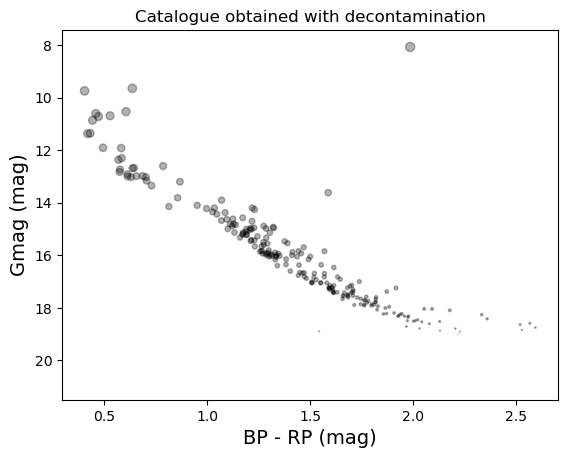

In [3]:
fig,ax = plt.subplots(sharex=True,sharey=True)

ax.set_title('Catalogue obtained with decontamination')
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.set_xlabel('BP - RP (mag)',fontsize=14)
ax.set_ylabel('Gmag (mag)',fontsize=14)
ax.invert_yaxis()


### Adjusting the isochrones

In [5]:
#reading the table of isochrones
iso = ascii.read("Catalogues/isochrones.csv")

In [6]:
kk, = np.where(iso["logAge"] == 8.05001)  #binaries
jj, = np.where(iso["logAge"] == 8.10001)
ll, = np.where(iso["logAge"] == 8.15001)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

In [7]:
EBV = 0.36
AV = 3.1 * EBV

# Modulo da distancia em Mpc tirado de CG+2020
Md = 10.2

DY = Md + 0.8363*AV
DX = (1.083-0.634)*AV

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

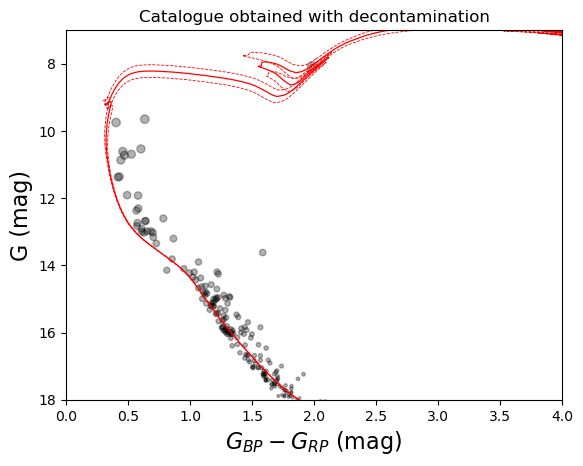

In [9]:
fig, ax = plt.subplots()
ax.set_title("Catalogue obtained with decontamination")
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 4.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)